In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
RANDOM_SEED=849
np.random.seed(RANDOM_SEED)

In [3]:
data_path = '/kaggle/input/titanic'
train_csv = pd.read_csv(data_path + '/train.csv')
df = pd.DataFrame(train_csv)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df = df.drop(['Cabin', 'Name', 'Ticket', 'Embarked', 'SibSp', 'Parch'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Fare         891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [8]:
print('Empty rows to be filled (Age) =', df['Age'].isnull().sum())

Empty rows to be filled (Age) = 177


In [9]:
df_ = df.copy()
df_['Age'].fillna(df['Age'].median(), inplace=True)
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
df_.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500


In [12]:
df_['Sex'] = le.fit_transform(df_['Sex'])
df_.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,1,22.0,7.2500
1,2,1,1,0,38.0,71.2833
2,3,1,3,0,26.0,7.9250
3,4,1,1,0,35.0,53.1000
4,5,0,3,1,35.0,8.0500


In [13]:
# relation between features and target
corr_matrix = df_.corr()
target_corr = corr_matrix['Survived']
print(target_corr.sort_values(ascending=False))

Survived       1.000000
Fare           0.257307
PassengerId   -0.005007
Age           -0.064910
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64


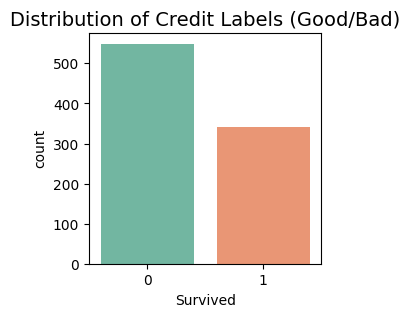

In [14]:
# distribution of the target variable `Survived`
plt.figure(figsize=(3, 3))
sns.countplot(data=df_, x='Survived', palette='Set2')
plt.title('Distribution of Credit Labels (Good/Bad)', fontsize=14)
plt.show()

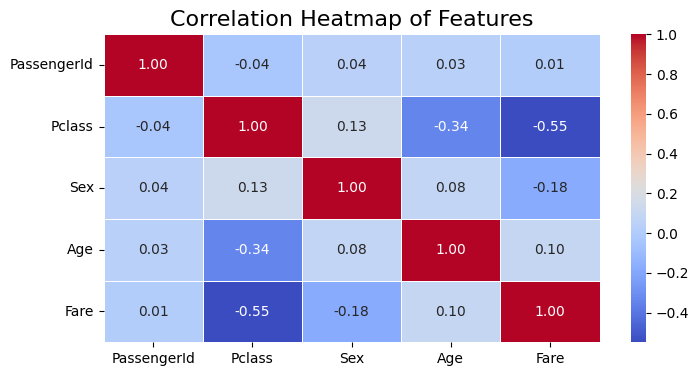

In [15]:
# correlation heatmap to explore feature relationships
plt.figure(figsize=(8, 4))
corr = df_.drop(columns=['Survived']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

In [16]:
X = df_.drop(['Survived', 'PassengerId'], axis=1)
X.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [17]:
X = X.values
X

array([[ 3.    ,  1.    , 22.    ,  7.25  ],
       [ 1.    ,  0.    , 38.    , 71.2833],
       [ 3.    ,  0.    , 26.    ,  7.925 ],
       ...,
       [ 3.    ,  0.    , 28.    , 23.45  ],
       [ 1.    ,  1.    , 26.    , 30.    ],
       [ 3.    ,  1.    , 32.    ,  7.75  ]])

In [18]:
y = df_['Survived'].values
y[:5]

array([0, 1, 1, 1, 0])

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
mc = MinMaxScaler()
# X = sc.fit_transform(X)
X = mc.fit_transform(X)
X

array([[ 0.82737724,  0.73769513, -0.56573646, -0.50244517],
       [-1.56610693, -1.35557354,  0.66386103,  0.78684529],
       [ 0.82737724, -1.35557354, -0.25833709, -0.48885426],
       ...,
       [ 0.82737724, -1.35557354, -0.1046374 , -0.17626324],
       [-1.56610693,  0.73769513, -0.25833709, -0.04438104],
       [ 0.82737724,  0.73769513,  0.20276197, -0.49237783]])

In [20]:
X.shape

(891, 4)

In [21]:
y.shape

(891,)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (712, 4)
X_test: (179, 4)
y_train: (712,)
y_test: (179,)


In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [25]:
# svm with default hyperparameters
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
print('model accuracy (default hyperparameters): \n{0:0.4f}'. format(accuracy_score(y_test, y_pred)))

model accuracy (default hyperparameters): 
0.7989


In [26]:
# svm with different c values, higher C means fewer outliers
c_values = [1, 10, 50, 100, 140, 150, 170, 200, 500, 700, 1000, 2000, 3000, 5000, 6000]

In [27]:
# plot accuracy vs. C values
def plot_acc_c(c_values, accs):
    plt.figure(figsize=(5, 3))
    plt.plot(c_values, accs, marker='o', linestyle='-', color='b', label='Accuracy')
    plt.xscale('log')
    plt.xlabel('C Value (log scale)')
    plt.ylabel('Accuracy')
    plt.title('SVM Accuracy vs. C (Regularization Parameter)')
    plt.grid(True)
    plt.legend()
    plt.show()

def perform_svc_eval(c_values, kernel):
    best_c, best_acc = 0, 0
    accs = []
    for c in c_values:
        svc=SVC(kernel=kernel, C=c)
        svc.fit(X_train, y_train)
        y_pred = svc.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accs.append(acc)
        if best_acc < acc:
            best_acc = acc
            best_c = c
        print(f'model accuracy (with C={c}): {acc:0.4f}')
    print(f'best accuracy at C = {best_c}\nbest accuracy = {best_acc:0.4f}')
    plot_acc_c(c_values, accs)

model accuracy (with C=1): 0.7989
model accuracy (with C=10): 0.8212
model accuracy (with C=50): 0.8156
model accuracy (with C=100): 0.7933
model accuracy (with C=140): 0.7933
model accuracy (with C=150): 0.7933
model accuracy (with C=170): 0.7933
model accuracy (with C=200): 0.8045
model accuracy (with C=500): 0.8045
model accuracy (with C=700): 0.8045
model accuracy (with C=1000): 0.7989
model accuracy (with C=2000): 0.7989
model accuracy (with C=3000): 0.8045
model accuracy (with C=5000): 0.8045
model accuracy (with C=6000): 0.8101
best accuracy at C = 10
best accuracy = 0.8212


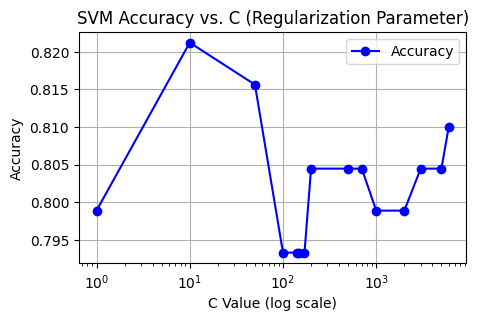

In [28]:
perform_svc_eval(c_values=c_values, kernel='rbf')

In [ ]:
# svm with linear kernel and different c values
perform_svc_eval(c_values=c_values, kernel='linear')

model accuracy (with C=1): 0.7877
model accuracy (with C=10): 0.7877
model accuracy (with C=50): 0.7877
model accuracy (with C=100): 0.7877
model accuracy (with C=140): 0.7877
model accuracy (with C=150): 0.7877
model accuracy (with C=170): 0.7877
model accuracy (with C=200): 0.7877


In [ ]:
# svm with poly kernel and different c values
perform_svc_eval(c_values=c_values, kernel='poly')

In [ ]:
# svm with sigmoid kernel and different c values
perform_svc_eval(c_values=c_values, kernel='sigmoid')

In [ ]:
df_.columns

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
x_plot = df_.iloc[:, [2, 3]].values  # best 2 features
y_plot = df['Survived'].values  # target variable

svm = SVC(kernel="rbf", gamma=0.5, C=2000)
svm.fit(x_plot, y_plot)

DecisionBoundaryDisplay.from_estimator(
    svm,
    x_plot,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel=df.columns[2],
    ylabel=df.columns[3],
)

plt.scatter(x_plot[:, 0], x_plot[:, 1], 
            c=y_plot, 
            s=20, edgecolors="k", cmap=plt.cm.Spectral)
plt.title("SVM Decision Boundary for German Credit Dataset (best Two Features)")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

svc = SVC(kernel='rbf', C=2000)
svc.fit(X_train, y_train)
y_pred_binary = svc.predict(X_test)
y_pred_binary

# Accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
print(f'Confusion Matrix:\n{cm}')